In [5]:
######################################################
######################################################
###############       problem 2      #################
######################################################
######################################################

In [6]:
%matplotlib inline
import pandas
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [7]:
input2 = pandas.read_csv("input_2.csv")

#splitting dataset [training/testing]
cut_pt = int(0.8*len(input2))
input2_train, input2_test = input2.iloc[:cut_pt], input2.iloc[cut_pt:]
x2_test, y2_test = input2_test['feature_value'], input2_test['class']

#splitting train dataset accord to class
grouped = input2_train.groupby('class')
classes={}
for c, data in grouped:
    classes[c] = data

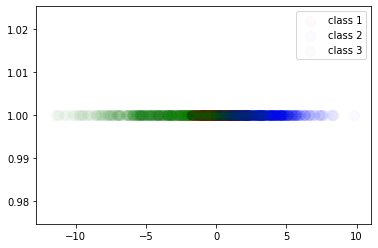

In [8]:
#visualize but the class size are too similar and only single feature with 2 possible value
base = len(classes[1]) + len(classes[2]) + len(classes[3])
plt.scatter(classes[1]['feature_value'], [1]*len(classes[1]), color='r',\
            s=100, alpha=0.02)
plt.scatter(classes[2]['feature_value'], [1]*len(classes[2]), color='b',\
            s=100, alpha=0.02)
plt.scatter(classes[3]['feature_value'], [1]*len(classes[3]), color='g',\
            s=100, alpha=0.02)
plt.legend(["class 1","class 2","class 3"])
plt.show()

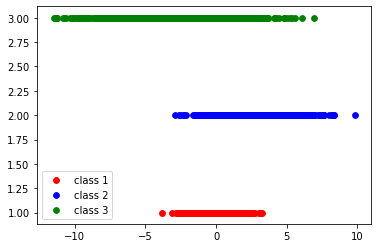

In [9]:
#separate layers
base = len(classes[1]) + len(classes[2]) + len(classes[3])
plt.scatter(classes[1]['feature_value'], classes[1]['class'], color='r', 
            s=len(classes[1])/(base)*100)
plt.scatter(classes[2]['feature_value'], classes[2]['class'], color='b', 
            s=len(classes[2])/(base)*100)
plt.scatter(classes[3]['feature_value'], classes[3]['class'], color='g', 
            s=len(classes[3])/(base)*100)
plt.legend(["class 1","class 2","class 3"])
plt.show()

In [10]:
#discriminant func: gi(x) = -1/2 log(2pi) - log(sd) - (x - mean)^2/(2*sd^2) + log P(Ci)
#Calc P(Ci)
pC1 = len(classes[1])/len(input2_train)
pC2 = len(classes[2])/len(input2_train)
pC3 = len(classes[3])/len(input2_train)
pCi = [pC1, pC2, pC3]
print("pCi value: ",pCi)

pCi value:  [0.34208333333333335, 0.3279166666666667, 0.33]


In [11]:
#calc mean_i
mean1 = classes[1]['feature_value'].mean()
mean2 = classes[2]['feature_value'].mean()
mean3 = classes[3]['feature_value'].mean()
mean_list = [mean1, mean2, mean3]
print("mean value: ", mean_list)

mean value:  [-0.025056430115166065, 3.0494696695961974, -2.859953974797454]


In [12]:
#calc sd (not using std as it calc (n/n-1)*s^2)
sd1 = np.sqrt(((classes[1]['feature_value']-mean1)**2).sum()/len(classes[1]))
sd2 = np.sqrt(((classes[2]['feature_value']-mean2)**2).sum()/len(classes[2]))
sd3 = np.sqrt(((classes[3]['feature_value']-mean3)**2).sum()/len(classes[3]))
sd_list = [sd1, sd2, sd3]
print("variance value: ", list(map(lambda x: x**2, sd_list)))

variance value:  [1.0604933047619924, 3.9256875493805583, 9.706441924363155]


In [13]:
#discriminant
def g(x,class_no):
    i = class_no-1
    return (1/2)*np.log(2*np.pi) - np.log(sd_list[i]) -\
           (x-mean_list[i])**2/(2*(sd_list[i]**2)) + np.log(pCi[i])

In [14]:
#testing
y2_pred1 = np.asarray([g(x2_test,1)])
y2_pred2 = np.asarray([g(x2_test,2)])
y2_pred3 = np.asarray([g(x2_test,3)])
result_distribution = np.concatenate((y2_pred1, y2_pred2, y2_pred3)).transpose()
print(result_distribution)

[[-0.96859602 -1.28510171 -2.20289439]
 [-2.46562636 -0.97717918 -2.63209777]
 [-1.71116826 -3.90650503 -1.38126107]
 ...
 [-9.91438299 -1.15452406 -4.13018518]
 [-1.04494026 -3.37545257 -1.43939434]
 [-0.4124412  -1.59953979 -1.96884305]]


In [15]:
#result
result = np.argmax((result_distribution), axis = 1) + 1
print("testcase_number  "+"feature_value  "+"classify_result","expected_result")
for i in range(len(result)):
    print(i,'\t\t',str.format('{0:.3f}\t\t', x2_test.iloc[i]),result[i],'\t\t',y2_test.iloc[i])

testcase_number  feature_value  classify_result expected_result
0 		 1.266		 1 		 1
1 		 2.175		 2 		 2
2 		 -1.825		 3 		 1
3 		 4.212		 2 		 2
4 		 -0.858		 1 		 3
5 		 -0.616		 1 		 1
6 		 4.201		 2 		 2
7 		 0.477		 1 		 1
8 		 -0.121		 1 		 2
9 		 5.413		 2 		 2
10 		 -0.948		 1 		 1
11 		 5.811		 2 		 2
12 		 -0.758		 1 		 1
13 		 0.684		 1 		 2
14 		 0.177		 1 		 1
15 		 2.776		 2 		 1
16 		 5.860		 2 		 2
17 		 -2.289		 3 		 3
18 		 1.782		 2 		 2
19 		 -0.197		 1 		 1
20 		 1.421		 1 		 3
21 		 4.421		 2 		 2
22 		 0.837		 1 		 1
23 		 -0.485		 1 		 1
24 		 -3.110		 3 		 3
25 		 -0.297		 1 		 3
26 		 0.432		 1 		 2
27 		 2.231		 2 		 2
28 		 -5.791		 3 		 3
29 		 4.594		 2 		 2
30 		 -5.753		 3 		 3
31 		 5.662		 2 		 2
32 		 -4.807		 3 		 3
33 		 2.713		 2 		 3
34 		 -1.983		 3 		 2
35 		 -3.404		 3 		 3
36 		 -0.309		 1 		 1
37 		 4.241		 2 		 2
38 		 3.672		 2 		 2
39 		 0.012		 1 		 1
40 		 -3.160		 3 		 3
41 		 6.110		 2 		 2
42 		 -2.078		 3 		 1
43 		 2.794		 2 		 2
44 

508 		 -4.745		 3 		 3
509 		 -1.509		 1 		 1
510 		 -10.431		 3 		 3
511 		 2.880		 2 		 2
512 		 2.130		 2 		 2
513 		 2.234		 2 		 2
514 		 3.836		 2 		 2
515 		 6.085		 2 		 2
516 		 -1.560		 1 		 1
517 		 0.263		 1 		 1
518 		 3.869		 2 		 2
519 		 1.225		 1 		 1
520 		 2.232		 2 		 2
521 		 0.740		 1 		 1
522 		 0.125		 1 		 1
523 		 -1.650		 3 		 3
524 		 -0.830		 1 		 3
525 		 -9.384		 3 		 3
526 		 1.328		 1 		 1
527 		 -0.892		 1 		 1
528 		 0.177		 1 		 1
529 		 0.638		 1 		 1
530 		 4.539		 2 		 2
531 		 2.371		 2 		 2
532 		 -0.123		 1 		 1
533 		 -1.195		 1 		 1
534 		 0.684		 1 		 2
535 		 -2.076		 3 		 3
536 		 -1.186		 1 		 3
537 		 4.523		 2 		 2
538 		 -5.963		 3 		 3
539 		 -1.341		 1 		 1
540 		 0.770		 1 		 1
541 		 7.712		 2 		 2
542 		 0.746		 1 		 1
543 		 -4.186		 3 		 3
544 		 -0.174		 1 		 1
545 		 -7.103		 3 		 3
546 		 -3.999		 3 		 3
547 		 1.959		 2 		 3
548 		 0.525		 1 		 1
549 		 5.998		 2 		 2
550 		 -0.069		 1 		 1
551 		 0.062		 1 		 1
552 		 -0.81

In [16]:
print('accuracy: ',(y2_test==result).sum(),'/',len(y2_test))

accuracy:  480 / 600


In [22]:
(0.787017+0.82653+0.78730)/3 

0.8002823333333334

In [17]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y2_test, result, average=None, labels=[1, 2, 3])

(array([0.71062271, 0.87096774, 0.87943262]),
 array([0.88181818, 0.78640777, 0.71264368]),
 array([0.78701826, 0.82653061, 0.78730159]),
 array([220, 206, 174]))

In [18]:
def confusion_matrix():
    #pirj = predicted result i and actual result j
    p1r1, p1r2, p1r3, p2r1, p2r2, p2r3, p3r1, p3r2, p3r3 = 0,0,0,0,0,0,0,0,0
    for i in range(len(y2_test)):
        if(y2_test.iloc[i]==1):
            if(result[i]==1): p1r1+=1
            elif(result[i]==2): p2r1+=1
            else: p3r1+=1
        elif(y2_test.iloc[i]==2):
            if(result[i]==1): p1r2+=1
            elif(result[i]==2): p2r2+=1
            else: p3r2+=1
        else:
            if(result[i]==1): p1r3+=1
            elif(result[i]==2): p2r3+=1
            else: p3r3+=1
    print('\t\t\033[96mpredict\033[0;0m\t')
    print('\t\t\033[96m1\t2\t3\033[0;0m')
    print('\t\033[96m1\033[0;0m\t'+'\033[1m'+str(p1r1)+'\t'+str(p2r1)+'\t'+str(p3r1)+'\033[0;0m')
    print('\033[96mactual\t2\033[0;0m\t'+'\033[1m'+str(p1r2)+'\t'+str(p2r2)+'\t'+str(p3r2)+'\033[0;0m')
    print('\t\033[96m3\033[0;0m\t'+'\033[1m'+str(p1r3)+'\t'+str(p2r3)+'\t'+str(p3r3)+'\033[0;0m')
    return "\033[96m---------confusion_matrix---------"
print(confusion_matrix())
print("acc: ",(y2_test==result).sum()/len(y2_test))

		predict	
		1	2	3
	1	194	11	15
actual	2	42	162	2
	3	37	13	124
---------confusion_matrix---------
acc:  0.8


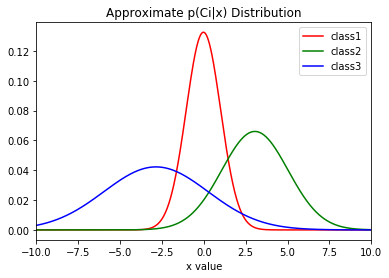

In [39]:
#visualization of result
#p(x|Ci)
input_pt = np.linspace(-10,10, num = 1000)
plt.plot(input_pt, stats.norm.pdf(input_pt,mean1,sd1)*pCi[0], 'r',\
         input_pt, stats.norm.pdf(input_pt,mean2,sd2)*pCi[1], 'g',\
         input_pt, stats.norm.pdf(input_pt,mean3,sd3)*pCi[2], 'b')
plt.xlim(-10,10)
plt.xlabel('x value')
plt.legend(['class1','class2','class3'])
plt.title('Approximate p(Ci|x) Distribution')
plt.show()

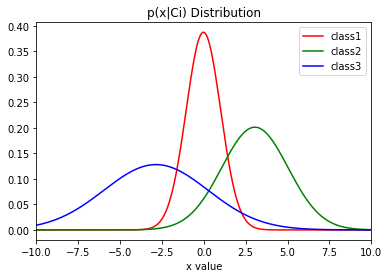

In [40]:
#visualization of result
#p(x|Ci)
input_pt = np.linspace(-10,10, num = 1000)
plt.plot(input_pt, stats.norm.pdf(input_pt,mean1,sd1), 'r',\
         input_pt, stats.norm.pdf(input_pt,mean2,sd2), 'g',\
         input_pt, stats.norm.pdf(input_pt,mean3,sd3), 'b')
plt.xlim(-10,10)
plt.xlabel('x value')
plt.legend(['class1','class2','class3'])
plt.title('p(x|Ci) Distribution')
plt.show()

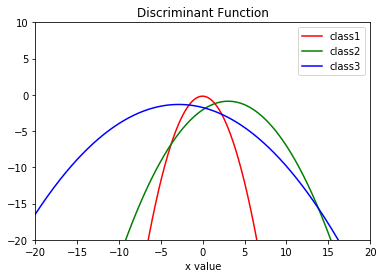

In [42]:
input_pt = np.linspace(-20,20, num = 1000)
plt.plot(input_pt, g(input_pt,1), 'r',\
         input_pt, g(input_pt,2), 'g',\
         input_pt, g(input_pt,3), 'b')
plt.ylim(-20,10)
plt.xlim(-20,20)
plt.xlabel('x value')
plt.legend(['class1','class2','class3'])
plt.title('Discriminant Function')
plt.show() 

In [ ]:
#########ques: doesnt seem class1+class2+class3 = 1 wor...

In [4]:
(0.93578 +0.74036+0.78400)/3

0.8200466666666667